In [188]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import csv

In [189]:
# helper functions
def dollar_formatter(x, pos):
    return f'${x:,.0f}'

def adjust_for_inflation(df, inflation_dict, base_year=2025):
    """Adjust values to base year dollars using inflation rates."""
    df_adjusted = df.copy()
    df_adjusted['value'] = df_adjusted['value'].astype(float)  # convert to float

    
    for year in df_adjusted['year'].unique():
        cumulative_inflation = 1.0
        # Compound inflation from the year to base year
        for y in range(year, base_year):
            cumulative_inflation *= (1 + inflation_dict[str(y)])
        
        df_adjusted.loc[df_adjusted['year'] == year, 'value'] *= cumulative_inflation
    
    return df_adjusted


In [190]:
# load the data frames and set up themes
pce_inflation_df = {"2025": 0.026, "2024": 0.027, "2023": 0.055, "2022": 0.063, "2021": 0.016, "2020": 0.018}
laf_fp_df = pd.read_csv("lafayette_financial_position_2020-2025.csv")
laf_act_df = pd.read_csv("lafayette_activities_2020-2025.csv")
laf_cf_df = pd.read_csv("lafayette_cash_flows_2020-2025.csv")

# colors
MAROON = '#822433'
GOLD = '#D19E15'
BROWN = '#8B4513'
GREY = '#A7A9AC'


In [191]:
# preprocess to filter for assets and liabilities and sum by year
laf_assets_df = laf_fp_df[laf_fp_df['section'] == 'assets']
laf_annual_assets = laf_assets_df.groupby('year')['value'].sum().reset_index()

laf_liabilities_df = laf_fp_df[laf_fp_df['section'] == 'liabilities']
laf_annual_liabilities = laf_liabilities_df.groupby('year')['value'].sum().reset_index()

laf_annual_assets_adjusted = adjust_for_inflation(laf_annual_assets, pce_inflation_df)
laf_annual_liabilities_adjusted = adjust_for_inflation(laf_annual_liabilities, pce_inflation_df)

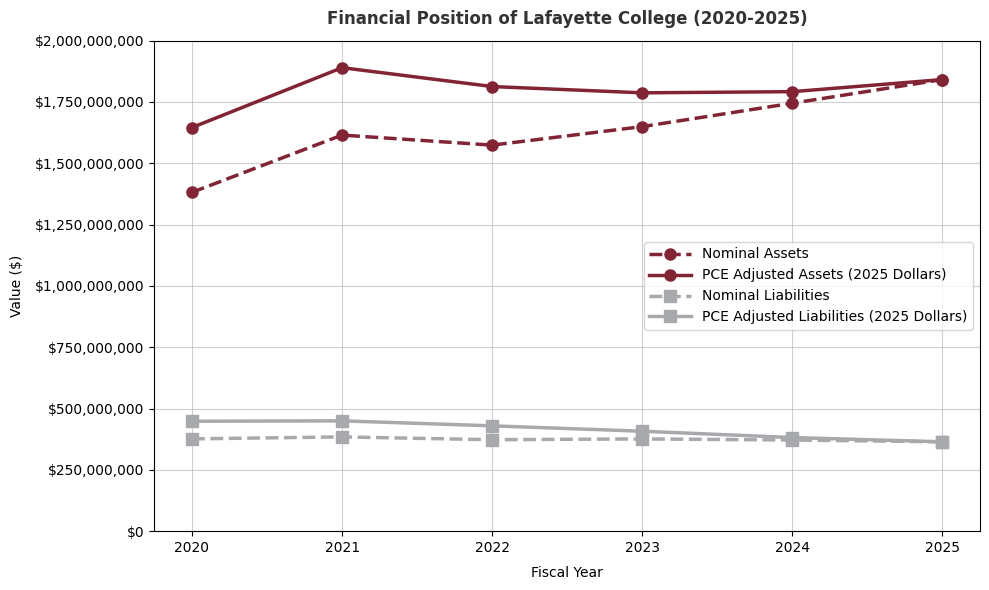

In [192]:
# TODO: Plot the net assets/difference
plt.figure(figsize=(10,6))

# plot assets over time
plt.plot(laf_annual_assets['year'], laf_annual_assets['value'], marker='o', markersize='8', linewidth=2.5, linestyle='--', color=MAROON, label='Nominal Assets')
plt.plot(laf_annual_assets_adjusted['year'], laf_annual_assets_adjusted['value'], marker='o', markersize='8', linewidth=2.5, linestyle='-', color=MAROON, label='PCE Adjusted Assets (2025 Dollars)')

# plot liabilities over time
plt.plot(laf_annual_liabilities['year'], laf_annual_liabilities['value'], marker='s', markersize='8', linewidth=2.5, linestyle='--', color=GREY, label='Nominal Liabilities')
plt.plot(laf_annual_liabilities_adjusted['year'], laf_annual_liabilities_adjusted['value'], marker='s', markersize='8', linewidth=2.5, linestyle='-', color=GREY, label='PCE Adjusted Liabilities (2025 Dollars)')

# legend and formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.title('Financial Position of Lafayette College (2020-2025)', fontsize=12, fontweight='bold', pad=12, color='#333333')
plt.xlabel('Fiscal Year', fontsize=10, labelpad=8)
plt.ylabel('Value ($)', fontsize=10, labelpad=8)
plt.ylim(0, 2_000_000_000) # set y range for ease of interpretation
plt.legend(loc='best', handlelength=3)
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()

plt.show()

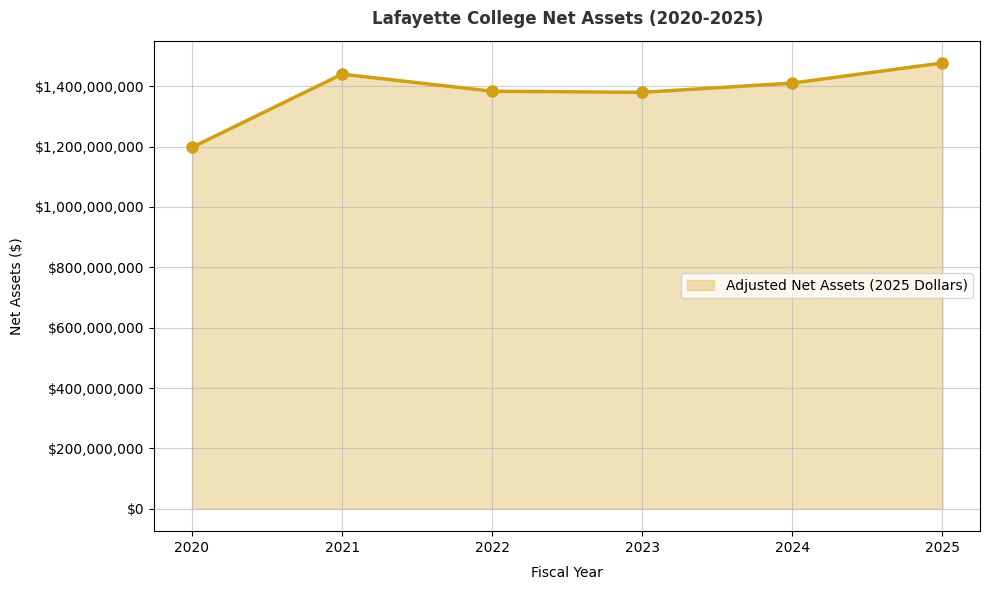

In [ ]:
# calculate net assets
laf_annual_net_assets_adjusted = pd.DataFrame({
    'year': laf_annual_assets_adjusted['year'],
    'value': laf_annual_assets_adjusted['value'] - laf_annual_liabilities_adjusted['value']
})

# plot net assets with fill
plt.figure(figsize=(10,6))

plt.fill_between(laf_annual_net_assets_adjusted['year'], 0, laf_annual_net_assets_adjusted['value'], 
                 alpha=0.3, color=GOLD, label='Adjusted Net Assets (2025 Dollars)')
plt.plot(laf_annual_net_assets_adjusted['year'], laf_annual_net_assets_adjusted['value'], 
         marker='o', markersize='8', linewidth=2.5, linestyle='-', color=GOLD)

# formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.title('Lafayette College Net Assets (2020-2025)', fontsize=12, fontweight='bold', pad=12, color='#333333')
plt.xlabel('Fiscal Year', fontsize=10, labelpad=8)
plt.ylabel('Net Assets ($)', fontsize=10, labelpad=8)
plt.legend(loc='right')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()

plt.show()